# Metode Weight Product

In [1]:
"""
KENAPA HARUS ADA PACKAGE PANDAS
    > Mencoba mengvisualisasikan data frame dengan rapi
    > Agar enak dipandang (biar nda bosan pas ngoding)

"""
import pandas as pd

"""
KENAPA HARUS ADA PACKAGE MATPLOTLIB
    > Visualisasi dalam bentuk diagram
    > Agar enak dipandang (biar nda bosan pas ngoding)

"""
import matplotlib.pyplot as plt

# Alternatif Dan Kriteria

In [2]:
"""
    Data alternatif pilihan dari masing-masing rambutan yang akan di seleksi.
    Maaf datanya dibuat dalam list manual tanpa menggunakan data csv
"""
alternatif = ['Rambutan Binjai','Rambutan Rapiah','Rambutan Lebak Bulus',
              'Rambutan Narmada','Rambutan Sinyonya','Rambutan Garuda',
              'Rambutan Kapulasan','Rambutan Cimacan'
             ]

# visualisasi menggunakan pandas DataFrame
alt = pd.DataFrame(alternatif,columns = ['Alternatif Rambutan'])

In [3]:
"""
    Bobot dari masing-masing alternatif yang tersedia, jadi bobotnya ini di tentukan berdasarkan hasil penelitian.
    Maaf datanya dibuat dalam list manual tanpa menggunakan data csv
"""
bobot_alternatif = [
    [4, 3, 3, 3],
    [3, 3, 2, 3],
    [3, 4, 2, 3],
    [3, 3, 3, 2],
    [2, 4, 3, 1],
    [3, 1, 1, 1],
    [2, 1, 3, 2],
    [3, 3, 3, 1]
]

# visualisasi menggunakan pandas DataFrame
mat = pd.DataFrame(bobot_alternatif ,columns = ['Bobot C1','Bobot C2','Bobot C3','Bobot C4'])

In [4]:
"""Menggabungkan kedua data hasil visualisasi menggunakan pandas DataFrame"""
pd.merge(alt, mat, left_index=True , right_index=True)

,Alternatif Rambutan,Bobot C1,Bobot C2,Bobot C3,Bobot C4
0,Rambutan Binjai,4,3,3,3
1,Rambutan Rapiah,3,3,2,3
2,Rambutan Lebak Bulus,3,4,2,3
3,Rambutan Narmada,3,3,3,2
4,Rambutan Sinyonya,2,4,3,1
5,Rambutan Garuda,3,1,1,1
6,Rambutan Kapulasan,2,1,3,2
7,Rambutan Cimacan,3,3,3,1


# Tentukan Bobot Awal

In [5]:
"""
    Menentukan bobot awal dari masing-masing kriteria
"""
rasa = int(input('Rasa? '))
warna = int(input('Warna? '))
ukuran = int(input('Ukuran? '))
kandungan_air = int(input('Kandungan Air? '))

dict_criteria = {'C1': rasa, 'C2': warna, 'C3': ukuran, 'C4': kandungan_air}

Rasa? 4
Warna? 3
Ukuran? 2
Kandungan Air? 1


In [6]:
dict_criteria

{'C1': 4, 'C2': 3, 'C3': 2, 'C4': 1}

# Perbaiki Bobot

In [7]:
"""
    Langkah selanjutnya adalah perbaikan bobot terhadap bobot dari kriteria awal yaitu [4, 3, 2, 1]
    dimana setiap bobot awal dibagi dengan total dari semua bobot awal 
"""
total = 0
for key, value in dict_criteria.items():
    total += value

criteria = [ (key, (value/total)) for key, value in dict_criteria.items() ]
criteria = dict(criteria)

print(criteria)

{'C1': 0.4, 'C2': 0.3, 'C3': 0.2, 'C4': 0.1}


In [8]:
# criteria['C2'] = criteria['C2']*-1

# Hitung Vektor S

In [10]:
"""
    Langkah selanjutnya mencari nilai dari vektor S.
    Vektor S adalah hasil kali dari bobot dari masing-masing kriteria yang dipangkatkan dengan masing-masing bobot perbaikan
"""
def vektorS(mtrx, cry):
    val_cry = cry.values()
    val = list(val_cry)
    samua = []
    for i in range(len(mtrx)):
        alternatif = []
        for j in range(len(mtrx[i])):
            alternatif.append(mtrx[i][j]**(val[j]))
        samua.append(alternatif)
    return samua

In [11]:
vektorS = vektorS(bobot_alternatif, criteria)
pd.DataFrame(vektorS ,columns = ['C1 Vektor S','C2 Vektor S','C3 Vektor S','C4 Vektor S'])

,C1 Vektor S,C2 Vektor S,C3 Vektor S,C4 Vektor S
0,1.741101,1.390389,1.245731,1.116123
1,1.551846,1.390389,1.148698,1.116123
2,1.551846,1.515717,1.148698,1.116123
3,1.551846,1.390389,1.245731,1.071773
4,1.319508,1.515717,1.245731,1.000000
5,1.551846,1.000000,1.000000,1.000000
6,1.319508,1.000000,1.245731,1.071773
7,1.551846,1.390389,1.245731,1.000000


In [13]:
def totalVektorS(valueVektorS):
    index = valueVektorS
    total =[]
    for i in range(len(index)):
        hasil = 1
        for j in index[i]:
            hasil *= j
        total.append(hasil)
    return total

In [14]:
totalVektorS = totalVektorS(vektorS)

In [15]:
pd.DataFrame(totalVektorS ,columns = ['Nilai Total Vektor S'])

,Nilai Total Vektor S
0,3.365865
1,2.766324
2,3.015676
3,2.880794
4,2.491462
5,1.551846
6,1.761730
7,2.687875


In [16]:
print(sum(totalVektorS))

20.521570708074346


# Menentukan Preverensi

In [17]:
"""
    Langkah selanjutnya menentukan preveerensi.
    Dimana nilai dari preverensi merupakan hasil pembagian antara masing-masing nilai vektor S
    dengan total jumlah dari nilai vektor s
"""
def preverensi(prev):
    alt =[]
    for value in totalVektorS:
        vi = value/sum(totalVektorS)
        alt.append(vi)
    return alt

In [18]:
# alt_select(totalVektorS)
pd.DataFrame(list(preverensi(totalVektorS)),columns = ['Preverensi Vi'])

,Preverensi Vi
0,0.164016
1,0.134801
2,0.146952
3,0.140379
4,0.121407
5,0.075620
6,0.085848
7,0.130978


# Perengkingan

In [19]:
"""
    Langkah terakhir perengkingan.
    Dimana pada proses ini, nilai preverensi terbesar adalah merupakan alternatif terbaik.
"""
data_Alt = dict(zip(alternatif, preverensi(totalVektorS)))
data_Alt

{'Rambutan Binjai': 0.16401597539579543,
 'Rambutan Rapiah': 0.13480077981344554,
 'Rambutan Lebak Bulus': 0.14695150070489724,
 'Rambutan Narmada': 0.14037880157210322,
 'Rambutan Sinyonya': 0.12140697779292071,
 'Rambutan Garuda': 0.0756202142609277,
 'Rambutan Kapulasan': 0.08584769728073884,
 'Rambutan Cimacan': 0.13097805317917136}

In [20]:
rang = pd.DataFrame(sorted(list(data_Alt.items())),columns = ['Alternatif','Nilai'] )
rang.sort_values(by=['Nilai'], ascending=False)

,Alternatif,Nilai
0,Rambutan Binjai,0.164016
4,Rambutan Lebak Bulus,0.146952
5,Rambutan Narmada,0.140379
6,Rambutan Rapiah,0.134801
1,Rambutan Cimacan,0.130978
7,Rambutan Sinyonya,0.121407
3,Rambutan Kapulasan,0.085848
2,Rambutan Garuda,0.075620


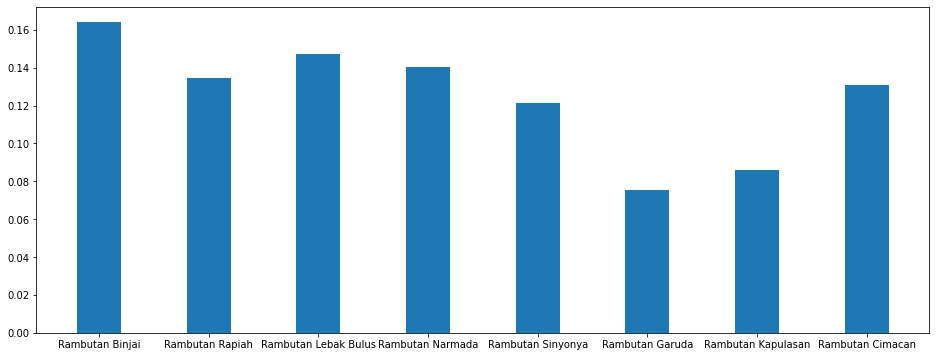

In [21]:
ax = plt.subplots(figsize = (16, 6))
plt.bar(alternatif, preverensi(totalVektorS), width = 0.4, )
plt.show()